# STAT 201 Group 1 Proposal

*Group Members: Cindy Cui, Devvrat Tiwari, Blasius Boniarga, Nilay Kumar, Richard Luo.*

# Introduction

Music is something that everyone can relate to - and if done right, a song can become so immensely popular that it is known by hundreds of millions of people around the world. What makes a song this popular? Can we predict what characteristics make a song more popular? 

The question we will try to answer with our project is, 

**Are songs that are more danceable more popular?**

## Describing our Dataset
Our dataset includes all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. We consider our population to be any song released onto the internet, and our dataset to be our sample of this population. 

Each song in our dataset is one observation, and the columns are features of the songs, such as the highest position that a song has been in the Spotify Top 200 Weekly Global Charts in 2020 and 2021, the number of times a song has made this chart, the overall tempo of the track, and more. 

### Streams
Streams describes the overall number of streams a song has. 

### Danceability
Danceability describes how suitable a song is for dancing, and is based on musical elements like tempo, rhythmic stability, beat strenght, and general regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

## Clarifying Our Question
We chose our variable, danceability, based on the research of Askin and Mauskapf (2014) (1), and Interiano, Kazemi, and Wang et al (2018) (2). They both show that danceability have positive correlations with the popularity of modern pop songs. 

We define a song as being more popular if it has more streams.

We define a song as "more danceable" if it has a danceability score greater than 0.5. A song is "less danceable" if it has a danceability score less than 0.5. 

Thus, our response variable is the number of streams of a song. In our analysis, we will analyze the mean and standard deviation of streams.


# Preliminary Results

We begin by analyzing our data. First, we load our libraries and set our seed. 

In [22]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)

set.seed(1)

Now we read our dataset from the web, and clean and wrangle it into a tidy format. 

We only keep the columns `danceability` and `streams`, and categorize a song as either danceable (`TRUE`) for values > 0.5, not danceable (`FALSE`) for values < 0.5, or neither for values exactly equal to 0.5. We ignore this category, because it would cause bias to define value of exaclty 0.5 as either danceable or not danceable. 

In [27]:
#Loading the dataset and selecting Streams and Danceability columns
spotify_data <- read_csv("https://github.com/cinadia/stat-201-project/raw/main/data/spotify_dataset.csv", show_col_types = FALSE) 
head(spotify_data)

Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,⋯,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",⋯,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],⋯,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],⋯,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",⋯,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",⋯,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",⋯,0.610,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137876,0.758,G#/Ab


To further examine our data, we compute the mean number of streams, as well as the standard deviation of our streams.

In [24]:
stats <- spotify_data %>%
    summarise(mean_streams = mean(Streams), 
              sd_streams = sd(Streams),
              min_streams = min(Streams), 
              max_streams = max(Streams)) 
stats

danceability_stats <- spotify_data %>%
    summarise(median_danceability = median(Danceability))
danceability_stats

summary_data <- summary(spotify_data)
summary_data

mean_streams,sd_streams,min_streams,max_streams
<dbl>,<dbl>,<dbl>,<dbl>
6339525,3376936,4176083,48633449


median_danceability
<dbl>
0.707


    Streams          Danceability    danceable      
 Min.   : 4176083   Min.   :0.1500   Mode :logical  
 1st Qu.: 4916132   1st Qu.:0.5990   FALSE:167      
 Median : 5269757   Median :0.7070   TRUE :1376     
 Mean   : 6339525   Mean   :0.6902                  
 3rd Qu.: 6457596   3rd Qu.:0.7960                  
 Max.   :48633449   Max.   :0.9800                  

From this, we can tell that our range of minimum and maximum streams is quite large, and the standard deviation tell us that our data is quite spread out. 

To better see this, we plot our data in a sample distribution. 

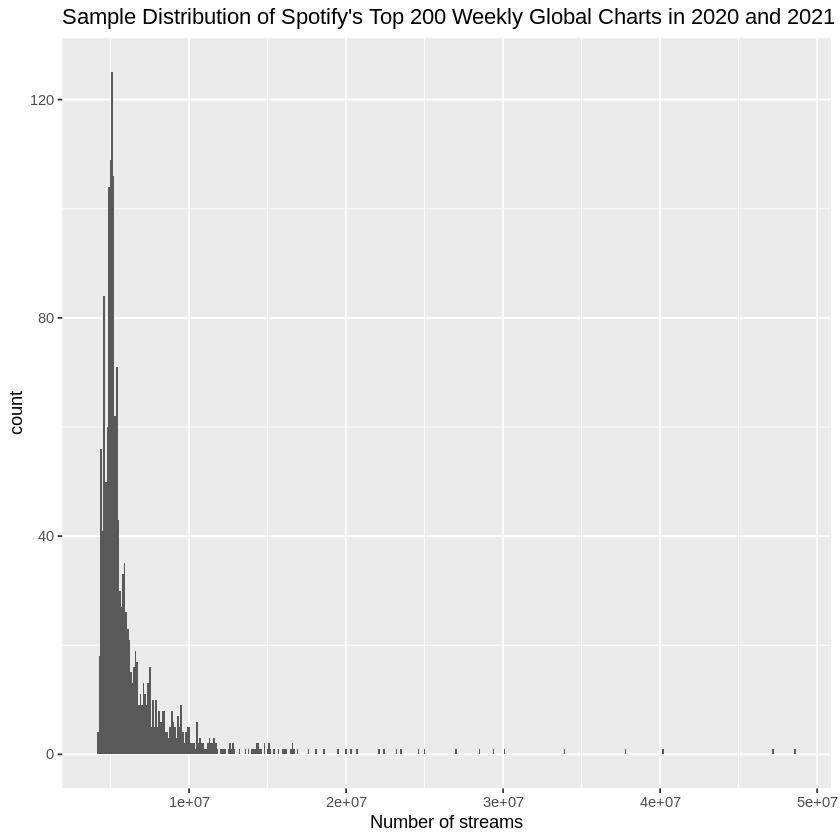

In [25]:
sample_dist <- spotify_data %>%
    ggplot() +
    geom_histogram(aes(x = Streams), binwidth = 100000) +
    xlab("Number of streams") +
    ggtitle("Sample Distribution of Spotify's Top 200 Weekly Global Charts in 2020 and 2021")
sample_dist

In [29]:
# Clean the 'Artist Followers' data by removing commas and converting to numeric
spotify_data$Artist.Followers <- as.numeric(gsub(",", "", spotify_data$Artist.Followers))

# Remove rows with NA values in 'Artist Followers'
spotify_data <- na.omit(spotify_data)

# Categorize artists based on their number of followers
spotify_data$Artist.Followers.Category <- ifelse(spotify_data$Artist.Followers > 1000000, "> 1M", "<= 1M")

# Compute the median popularity score for each category
median_popularity_by_followers_category <- spotify_data %>%
  group_by(Artist.Followers.Category) %>%
  summarize(Median.Popularity = median(Popularity))

# Output the median popularity for each category
print(median_popularity_by_followers_category)

# Create a boxplot for visual comparison
boxplot(Popularity ~ Artist.Followers.Category, data = spotify_data, main = "Popularity by Artist Followers Category",
        xlab = "Artist Followers Category", ylab = "Popularity")


Warning message:
“Unknown or uninitialised column: `Artist.Followers`.”


ERROR: [1m[33mError[39m in `$<-`:[22m
[1m[22m[33m![39m Assigned data `as.numeric(gsub(",", "",
  spotify_data$Artist.Followers))` must be compatible with existing data.
[31m✖[39m Existing data has 1556 rows.
[31m✖[39m Assigned data has 0 rows.
[36mℹ[39m Only vectors of size 1 are recycled.
[1mCaused by error in `vectbl_recycle_rhs_rows()`:[22m
[33m![39m Can't recycle input of size 0 to size 1556.


Indeed, we see that our distribution is right-skewed, with the vast majority of songs having less than 10,000,000 streams.

**TODO: IDK WHAT OTHER KINDS OF GRAPHS TO PLOT**

# Methods

**...Our preliminary results are trustworthy because....**

**...However, our preliminary results are not trustworthy because...**

Therefore, we plan to conduct a hypothesis test and construct a confidence interval to address these concerns. 

Our hypothesis test is as follows: 

$H_0$: The mean number of streams of a more danceable song is equivalent to the mean number of streams of a less danceable song. 
 
$H_1$: The mean number of streams of a more danceable song is greater than the mean number of streams of a less danceable song. 

We will also construct a 95% confidence interval **.... to do what...??? to show what???**


## Reflections on our final report
Based on previous research, we expect that more danceable songs will be more popular. This could impact how artists create music since artists want their work to be recognized, which is easier to do when your work is more popular; thus, artists could tailor their songs to be more danceable to increase the chances that their song will be more popular. This brings up future questions of what other characteristics makes songs more popular, and perhaps how these characteristics change over time, specifically with how rapidly social media trends change nowadays. 

# Bibliography


1. Askin, N., Mauskapf, M. (2014). Cultural Attributes and their Influence on Consumption Patterns in Popular Music. *Social Informatics*. 508-530. doi:10.1007/978-3-319-13734-6_36. 

2. Interiano, M., Kazemi, K., Wang, L. et al. (2018). Musical trends and predictability of success in contemporary songs in and out of the top charts. *Royal Society Open Science*, *5*. doi:10.1098/rsos.171274. 
